In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
print("Available GPU: ", tf.config.list_physical_devices('GPU'))

Available GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Loading the EMNIST dataset from Google Drive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Lezioni/ML/datasets/emnist-letters.csv")
X = df.iloc[:,1:].to_numpy().reshape(-1, 28, 28, order="F")
y = df.iloc[:,0].to_numpy()-1

In [ ]:
X = X.reshape(-1,28,28,1)
X.shape

(88799, 28, 28, 1)

Let's spit the dataset into training and testing set, using train_test_split() function, with the testing set having a size of about 15% of the data of the original dataset.

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_test = X_test / 255.

In [ ]:
X_train_full.shape

(75479, 28, 28, 1)

In [ ]:
X_test.shape

(13320, 28, 28, 1)

Let's spit the full training set into training and validation set, with the validation set having a size of about 15% of the data of the full_trainig set.

In [ ]:
X_valid, X_train = X_train_full[:11300] / 255., X_train_full[11300:] / 255.
y_valid, y_train = y_train_full[:11300], y_train_full[11300:]

In [ ]:
X_train.shape

(64179, 28, 28, 1)

In [ ]:
X_valid.shape

(11300, 28, 28, 1)

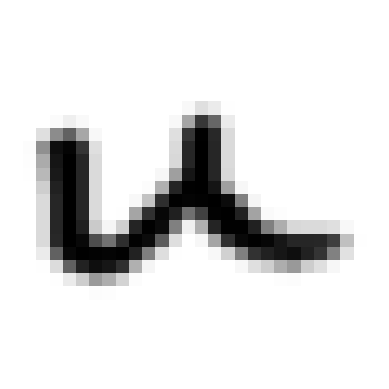

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
letters = len(set(y_train))
print(letters)

26


In [ ]:
class_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L","M",
               "N", "O", "P", "Q", "R", "S","T", "U", "V", "W", "X", "Y", "Z"]

Model based on Convolutional Neural Network with:
  - 3 convolutional layers with 50, 100 and 150 units with ReLu activation function;
  - 3 pooling layers with stride=2;
  - 3 fully connected layers with 250, 150 units and ReLu as activation function and 26 units with softmax in the output layer;
  - Batch Normalization;
  - Dropout;

Using Early Stopping to avoid overfitting, Sparse categorical crossentropy as loss function to classify letters and Adam as Optimization algorithm.

In [ ]:
ExamCNN = tf.keras.models.Sequential([

            tf.keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
            keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=100, kernel_size=3,activation='relu'),
            keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=150, kernel_size=3,activation='relu'),
            keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(250, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(150, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(26, activation="softmax")])

ExamCNN.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

ExamCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 50)        200       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 100)       45100     
                                                                 
 batch_normalization_4 (Bat  (None, 12, 12, 100)       400       
 chNormalization)                                                
                                                      

In [ ]:
historyExamCNN = ExamCNN.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                   callbacks=[keras.callbacks.EarlyStopping(patience=7)])

Epoch 1/50
2006/2006 [==============================] - 15s 6ms/step - loss: 0.5975 - accuracy: 0.8161 - val_loss: 0.2536 - val_accuracy: 0.9166
Epoch 2/50
2006/2006 [==============================] - 12s 6ms/step - loss: 0.3039 - accuracy: 0.9033 - val_loss: 0.2198 - val_accuracy: 0.9283
Epoch 3/50
2006/2006 [==============================] - 12s 6ms/step - loss: 0.2569 - accuracy: 0.9169 - val_loss: 0.2283 - val_accuracy: 0.9258
Epoch 4/50
2006/2006 [==============================] - 12s 6ms/step - loss: 0.2318 - accuracy: 0.9241 - val_loss: 0.2166 - val_accuracy: 0.9242
Epoch 5/50
2006/2006 [==============================] - 11s 6ms/step - loss: 0.2135 - accuracy: 0.9294 - val_loss: 0.1923 - val_accuracy: 0.9374
Epoch 6/50
2006/2006 [==============================] - 11s 6ms/step - loss: 0.1948 - accuracy: 0.9347 - val_loss: 0.2008 - val_accuracy: 0.9335
Epoch 7/50
2006/2006 [==============================] - 11s 6ms/step - loss: 0.1845 - accuracy: 0.9369 - val_loss: 0.2092 - val_ac

In [ ]:
evaluationCNN = ExamCNN.evaluate(X_test, y_test)

417/417 [==============================] - 2s 4ms/step - loss: 0.2120 - accuracy: 0.9389


In [ ]:
X_items = X_test[1:4]
y_prob = ExamCNN.predict(X_items)
y_prob.round(2)

1/1 [==============================] - 0s 17ms/step


array([[0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.95, 0.04,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [ ]:
y_pred = np.argmax(ExamCNN.predict(X_items), axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 18ms/step


array(['U', 'X', 'O'], dtype='<U1')

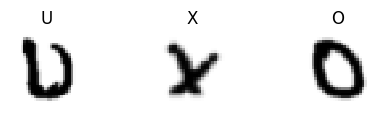

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_items):
    plt.subplot(2, 4, index+1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index+1]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

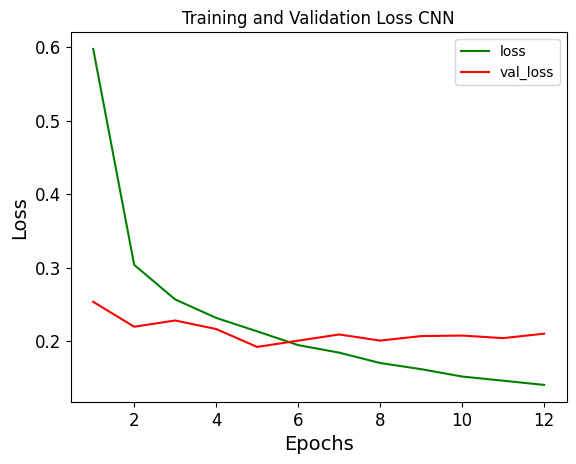

In [ ]:
loss = historyExamCNN.history['loss']
val_loss = historyExamCNN.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.title('Training and Validation Loss CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

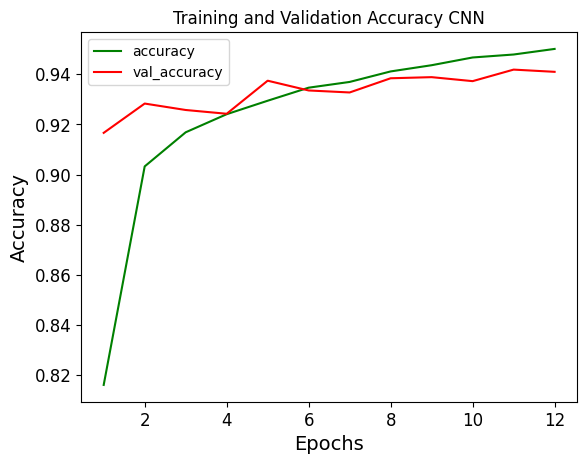

In [ ]:
accuracy = historyExamCNN.history['accuracy']
val_accuracy = historyExamCNN.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'g', label='accuracy')
plt.plot(epochs, val_accuracy, 'r', label='val_accuracy')
plt.title('Training and Validation Accuracy CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model based on previous CNN with the application of the Noise Injection as Regularization technique.

In [ ]:
noise_factor = 0.3
x_noisy_train = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_noisy_train = np.clip(x_noisy_train, 0., 1.)

In [ ]:
ExamNoisyCNN = tf.keras.models.Sequential([

            tf.keras.layers.Conv2D(filters=50, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
            keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=100, kernel_size=3,activation='relu'),
            keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=150, kernel_size=3,activation='relu'),
            keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(250, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(150, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(26, activation="softmax")])


ExamNoisyCNN.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

ExamNoisyCNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 50)        200       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 100)       45100     
                                                                 
 batch_normalization_7 (Bat  (None, 12, 12, 100)       400       
 chNormalization)                                                
                                                      

In [ ]:
historyExamNoisyCNN = ExamNoisyCNN.fit(x_noisy_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=7)])

Epoch 1/50
2006/2006 [==============================] - 14s 6ms/step - loss: 0.7560 - accuracy: 0.7671 - val_loss: 0.3831 - val_accuracy: 0.8761
Epoch 2/50
2006/2006 [==============================] - 12s 6ms/step - loss: 0.3849 - accuracy: 0.8772 - val_loss: 0.2747 - val_accuracy: 0.9131
Epoch 3/50
2006/2006 [==============================] - 12s 6ms/step - loss: 0.3218 - accuracy: 0.8969 - val_loss: 0.2967 - val_accuracy: 0.9073
Epoch 4/50
2006/2006 [==============================] - 11s 6ms/step - loss: 0.2821 - accuracy: 0.9079 - val_loss: 0.2562 - val_accuracy: 0.9125
Epoch 5/50
2006/2006 [==============================] - 11s 6ms/step - loss: 0.2562 - accuracy: 0.9156 - val_loss: 0.2562 - val_accuracy: 0.9216
Epoch 6/50
2006/2006 [==============================] - 11s 6ms/step - loss: 0.2361 - accuracy: 0.9206 - val_loss: 0.2385 - val_accuracy: 0.9207
Epoch 7/50
2006/2006 [==============================] - 12s 6ms/step - loss: 0.2154 - accuracy: 0.9287 - val_loss: 0.2455 - val_ac

In [ ]:
evaluationNoisyCNN = ExamNoisyCNN.evaluate(X_test, y_test)

417/417 [==============================] - 1s 3ms/step - loss: 0.2906 - accuracy: 0.9212


In [ ]:
X_items = X_test[1:4]
y_prob = ExamNoisyCNN.predict(X_items)
y_prob.round(2)

1/1 [==============================] - 0s 19ms/step


array([[0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.01,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.98, 0.01, 0.  ],
       [0.  , 0.01, 0.  , 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  ,
        0.  , 0.  , 0.  , 0.39, 0.  , 0.  , 0.  , 0.01, 0.  , 0.07, 0.  ,
        0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [ ]:
y_pred = np.argmax(ExamNoisyCNN.predict(X_items), axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 19ms/step


array(['U', 'X', 'D'], dtype='<U1')

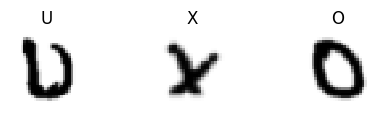

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_items):
    plt.subplot(2, 4, index+1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index+1]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

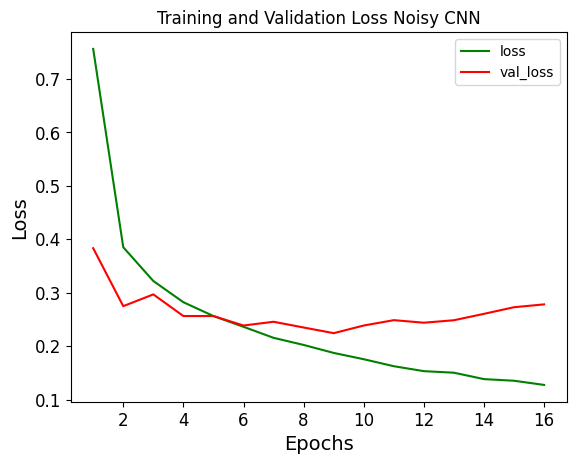

In [ ]:
loss = historyExamNoisyCNN.history['loss']
val_loss = historyExamNoisyCNN.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.title('Training and Validation Loss Noisy CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

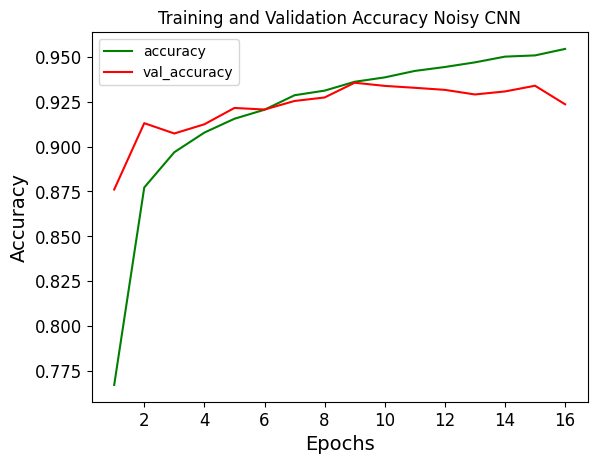

In [ ]:
accuracy = historyExamNoisyCNN.history['accuracy']
val_accuracy = historyExamNoisyCNN.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'g', label='accuracy')
plt.plot(epochs, val_accuracy, 'r', label='val_accuracy')
plt.title('Training and Validation Accuracy Noisy CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The performances of the two convolutional networks are similar w.r.t accuracy but w.r.t loss, the CNN without noise works better. Probably the base CNN is already sufficiently complex and able to capture the patterns in the data without the addition of noise, so the injection of noise is superfluous or, in small part, harmful.

Model based on a FeedForward Neural Network with::
  - 1 input layer;
  - 5 hidden layers with ReLu act. function;
  - 1 output with Softmax act. function;
  - Batch Normalization;

Using Early Stopping to avoid overfitting, Sparse categorical crossentropy as loss function to classify letters and Adam as Optimization algorithm.

In [ ]:
ExamFFNN = keras.models.Sequential()

ExamFFNN.add(keras.layers.Flatten(input_shape=[28, 28]))
ExamFFNN.add(keras.layers.Dense(250, activation="relu"))
ExamFFNN.add(keras.layers.BatchNormalization())
ExamFFNN.add(keras.layers.Dense(200, activation="relu"))
ExamFFNN.add(keras.layers.BatchNormalization())
ExamFFNN.add(keras.layers.Dense(150, activation="relu"))
ExamFFNN.add(keras.layers.BatchNormalization())

ExamFFNN.add(keras.layers.Dense(100, activation="relu"))
ExamFFNN.add(keras.layers.BatchNormalization())
ExamFFNN.add(keras.layers.Dense(50, activation="relu"))
ExamFFNN.add(keras.layers.BatchNormalization())
ExamFFNN.add(keras.layers.Dense(26, activation="softmax"))

ExamFFNN.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

ExamFFNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 250)               196250    
                                                                 
 batch_normalization_9 (Bat  (None, 250)               1000      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 200)               50200     
                                                                 
 batch_normalization_10 (Ba  (None, 200)               800       
 tchNormalization)                                               
                                                                 
 dense_11 (Dense)            (None, 150)              

In [ ]:
historyExamFFNN = ExamFFNN.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=7)])

Epoch 1/50
2006/2006 [==============================] - 23s 8ms/step - loss: 0.9179 - accuracy: 0.7281 - val_loss: 0.4987 - val_accuracy: 0.8416
Epoch 2/50
2006/2006 [==============================] - 17s 8ms/step - loss: 0.5337 - accuracy: 0.8301 - val_loss: 0.4219 - val_accuracy: 0.8613
Epoch 3/50
2006/2006 [==============================] - 17s 9ms/step - loss: 0.4468 - accuracy: 0.8576 - val_loss: 0.4017 - val_accuracy: 0.8653
Epoch 4/50
2006/2006 [==============================] - 17s 8ms/step - loss: 0.3930 - accuracy: 0.8726 - val_loss: 0.3533 - val_accuracy: 0.8869
Epoch 5/50
2006/2006 [==============================] - 16s 8ms/step - loss: 0.3555 - accuracy: 0.8829 - val_loss: 0.3304 - val_accuracy: 0.8940
Epoch 6/50
2006/2006 [==============================] - 16s 8ms/step - loss: 0.3255 - accuracy: 0.8905 - val_loss: 0.3359 - val_accuracy: 0.8861
Epoch 7/50
2006/2006 [==============================] - 17s 8ms/step - loss: 0.3011 - accuracy: 0.8981 - val_loss: 0.3313 - val_ac

In [ ]:
evaluationFFNN = ExamFFNN.evaluate(X_test, y_test)

417/417 [==============================] - 1s 3ms/step - loss: 0.3009 - accuracy: 0.9092


In [ ]:
X_items = X_test[1:4]
y_prob = ExamFFNN.predict(X_items)
y_prob.round(2)

1/1 [==============================] - 1s 541ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.97, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [ ]:
y_pred = np.argmax(ExamFFNN.predict(X_items), axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 19ms/step


array(['U', 'X', 'O'], dtype='<U1')

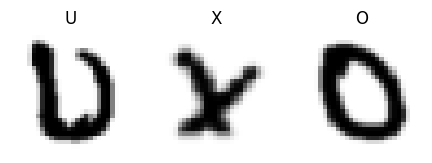

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_items):
    plt.subplot(1, 4, index+1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index+1]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

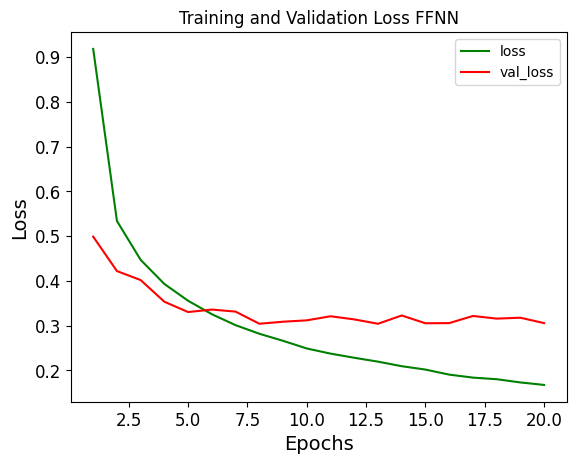

In [ ]:
loss = historyExamFFNN.history['loss']
val_loss = historyExamFFNN.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.title('Training and Validation Loss FFNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

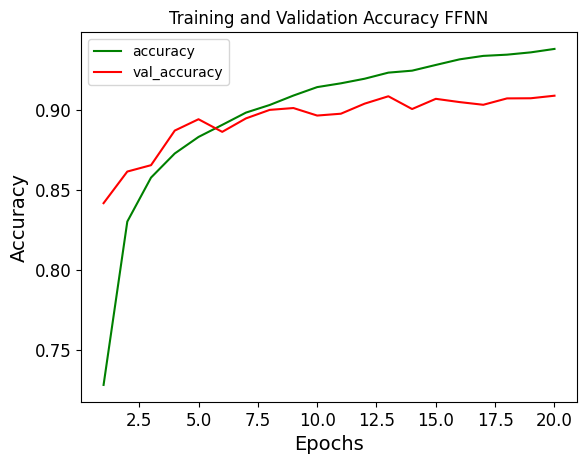

In [ ]:
accuracy = historyExamFFNN.history['accuracy']
val_accuracy = historyExamFFNN.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'g', label='accuracy')
plt.plot(epochs, val_accuracy, 'r', label='val_accuracy')
plt.title('Training and Validation Accuracy FFNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy of CNN vs. Noisy CNN vs. FFNN on validation set



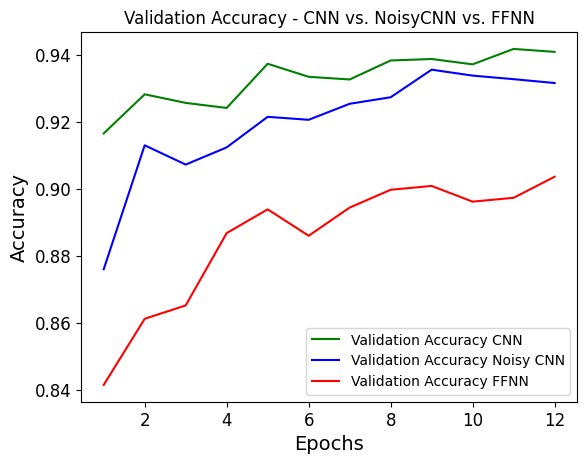

In [ ]:
val_accuracyCNN = historyExamCNN.history['val_accuracy']
val_accuracyNoisyCNN = historyExamNoisyCNN.history['val_accuracy']
val_accuracyFFNN = historyExamFFNN.history['val_accuracy']

epochs = range(1, min(len(val_accuracyCNN), len(val_accuracyNoisyCNN), len(val_accuracyFFNN)) + 1)
plt.plot(epochs, val_accuracyCNN[:min(len(val_accuracyCNN), len(val_accuracyNoisyCNN), len(val_accuracyFFNN))], 'g', label='Validation Accuracy CNN')
plt.plot(epochs, val_accuracyNoisyCNN[:min(len(val_accuracyCNN), len(val_accuracyNoisyCNN), len(val_accuracyFFNN))], 'b', label='Validation Accuracy Noisy CNN')
plt.plot(epochs, val_accuracyFFNN[:min(len(val_accuracyCNN), len(val_accuracyNoisyCNN), len(val_accuracyFFNN))], 'r', label='Validation Accuracy FFNN')
plt.title('Validation Accuracy - CNN vs. NoisyCNN vs. FFNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss of CNN vs. Noisy CNN vs. FFNN on validation set

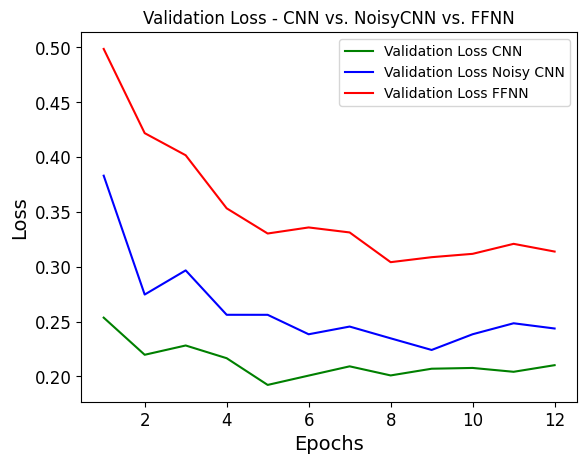

In [ ]:
val_lossCNN = historyExamCNN.history['val_loss']
val_lossNoisyCNN = historyExamNoisyCNN.history['val_loss']
val_lossFFNN = historyExamFFNN.history['val_loss']

epochs = range(1, min(len(val_lossCNN), len(val_lossNoisyCNN), len(val_lossFFNN)) + 1)
plt.plot(epochs, val_lossCNN[:min(len(val_lossCNN), len(val_lossNoisyCNN), len(val_lossFFNN))], 'g', label='Validation Loss CNN')
plt.plot(epochs, val_lossNoisyCNN[:min(len(val_lossCNN), len(val_lossNoisyCNN), len(val_lossFFNN))], 'b', label='Validation Loss Noisy CNN')
plt.plot(epochs, val_lossFFNN[:min(len(val_lossCNN), len(val_lossNoisyCNN), len(val_lossFFNN))], 'r', label='Validation Loss FFNN')
plt.title('Validation Loss - CNN vs. NoisyCNN vs. FFNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model based on Random Forest with 100 estimetors

In [ ]:
X_train_full_rf = X_train_full / 255.
X_flat_train = X_train_full_rf.reshape((X_train_full_rf.shape[0], -1))
X_flat_test = X_test.reshape((X_test.shape[0], -1))

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_flat_train, y_train_full)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_flat_test)

accuracy = accuracy_score(y_test, y_pred)
loss = (y_test, y_pred)
print(accuracy)

(array([ 6, 20, 23, ...,  3, 12, 16]), array([ 0,  3, 23, ...,  3, 12, 16])) 0.8752252252252253


Accuracy obtained on the testing set with CNN, Noisy CNN, FFNN and Random Forest

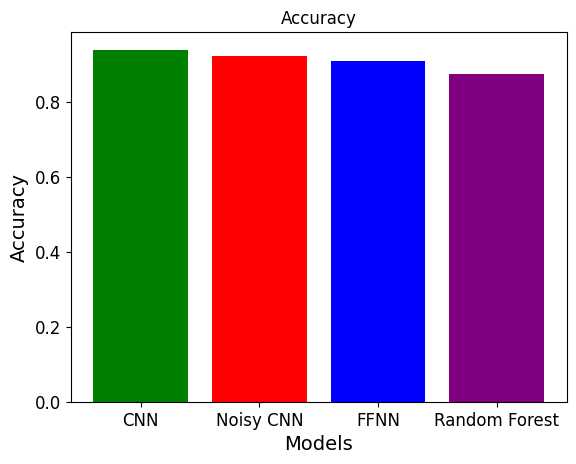

In [ ]:
test_accuracy = [evaluationCNN[1], evaluationNoisyCNN[1], evaluationFFNN[1], accuracy]
labels = ['CNN', 'Noisy CNN', 'FFNN', 'Random Forest']

plt.bar(labels, test_accuracy, color=['green', 'red', 'blue', 'purple'])
plt.title('Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

Loss obtained on the testing set with CNN, Noisy CNN, FFNN

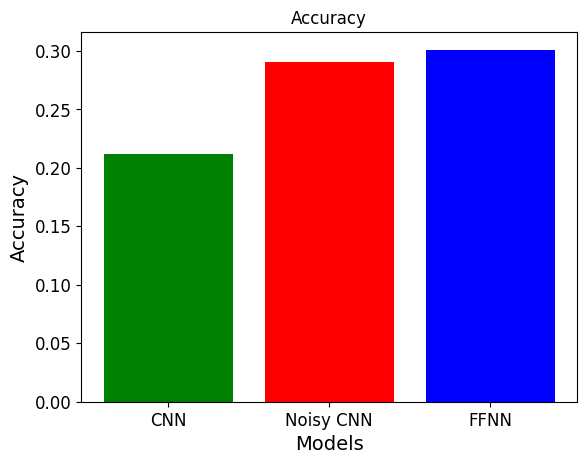

In [ ]:
test_loss = [evaluationCNN[0], evaluationNoisyCNN[0], evaluationFFNN[0]]
labels = ['CNN', 'Noisy CNN', 'FFNN']

plt.bar(labels, test_loss, color=['green', 'red', 'blue'])
plt.title('Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()